In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

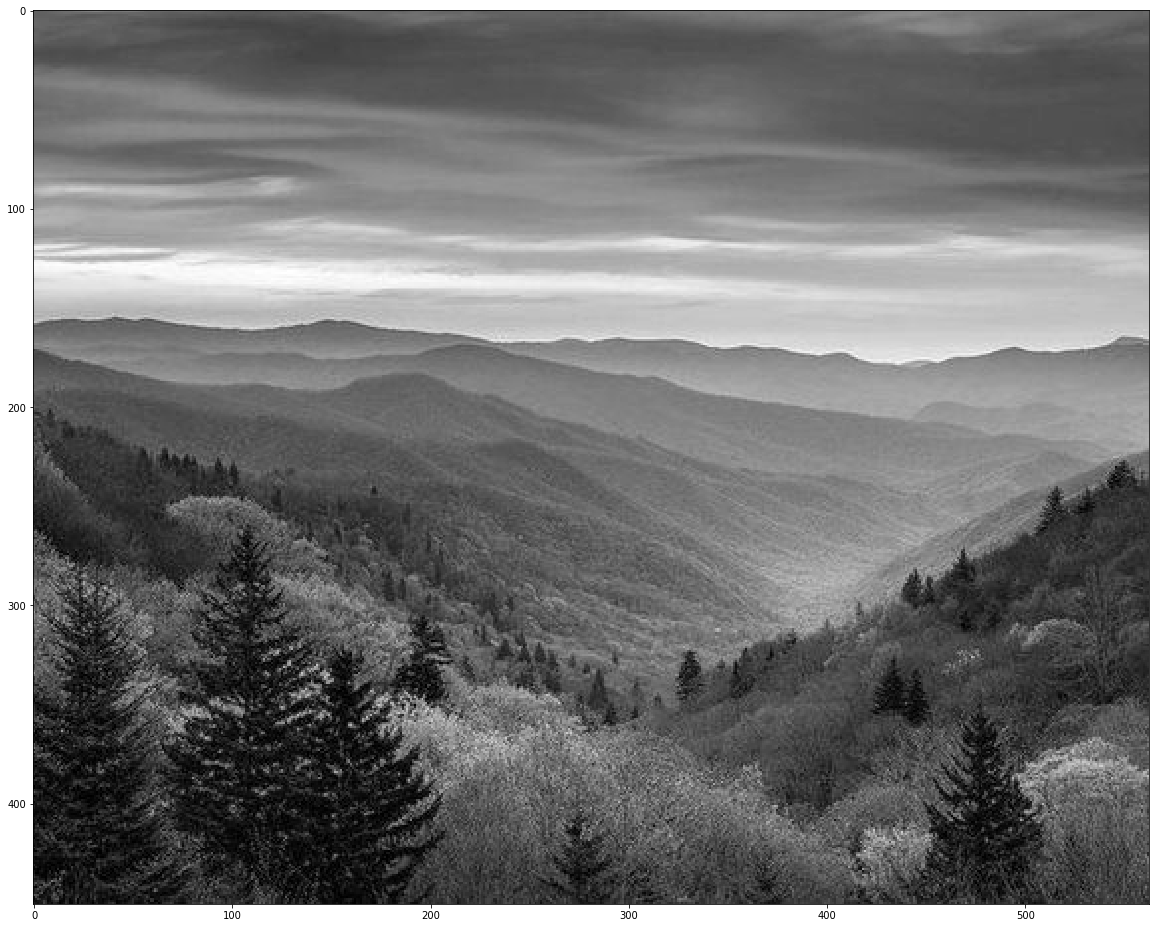

In [9]:
image = cv2.imread("../data/img5.jpg", 0)
plt.figure(figsize=(20,20))
plt.imshow(image, cmap = "gray")

In [10]:
np.unique(image)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

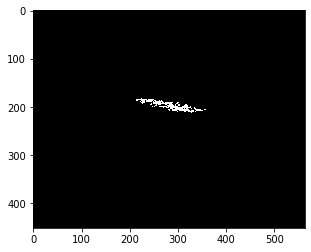

In [11]:
from skimage.morphology import flood
mask = flood(image, (200,300), tolerance=2)
plt.imshow(mask, cmap="gray")

In [12]:
masks = []
allmasks = np.zeros_like((image)).astype("bool")
x,y = 0,0
allmasks.any() == False

True

In [13]:
while allmasks.all() == False:
    mask = flood(image, (x,y), tolerance=10)
    masks.append(mask)
    allmasks = np.logical_or(allmasks, mask)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if allmasks[i,j] == False:
                x,y = i,j
                break
print(len(masks))


13852


In [14]:
print(allmasks.all())

True


In [15]:
label = np.zeros_like((image)).astype("uint32")
for i in range(len(masks)):
    # masks[i][masks[i] == True] = i
    label[masks[i] == True] = i

np.unique(label)

array([    0,     1,     2, ..., 13849, 13850, 13851], dtype=uint32)

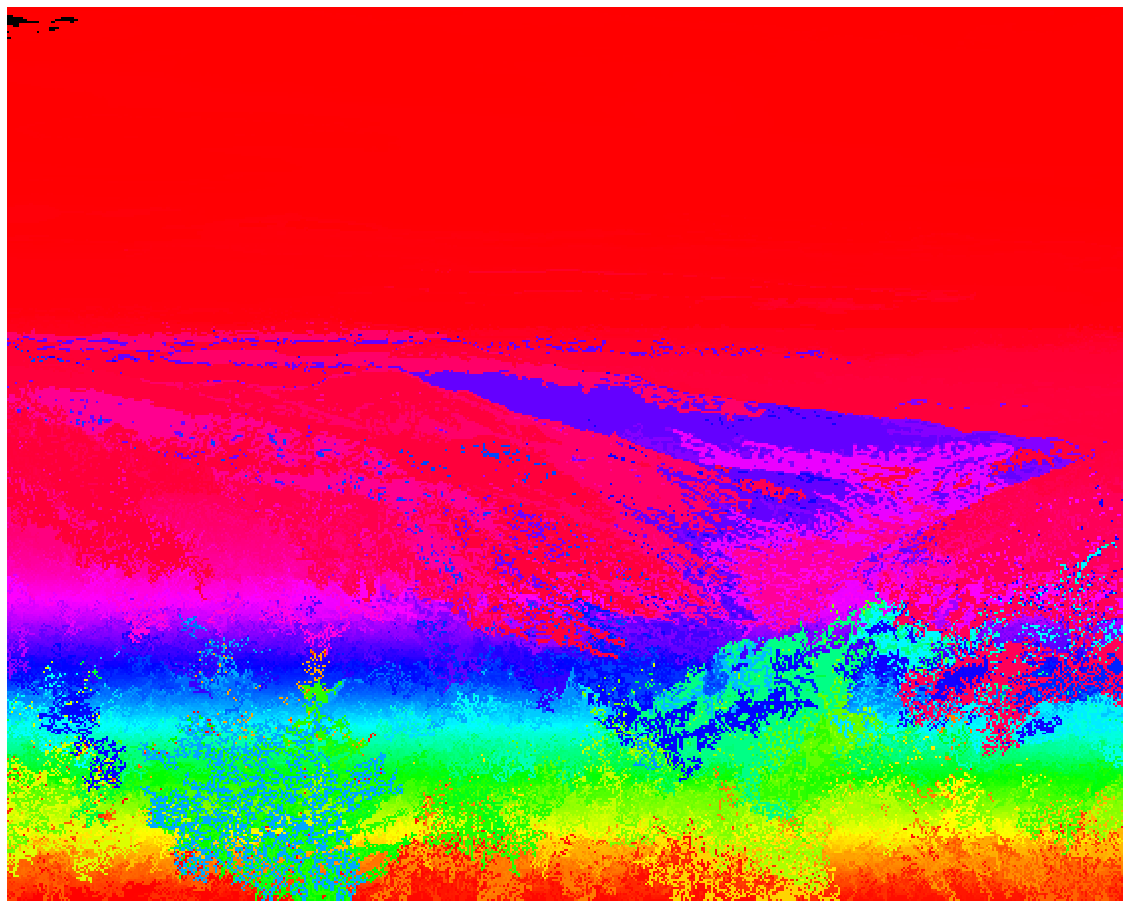

In [16]:
import colorsys
unique_vals = np.unique(label)
for val in range(len(unique_vals)):
    label[label == unique_vals[val]] = val

final = np.zeros((image.shape[0], image.shape[1], 3))
final[:, :, 0] = label
final[:, :, 1] = label
final[:, :, 2] = label
final = final.astype('uint8')


num_regions = len(np.unique(label))

for i in range(1, num_regions):
    final[label == i] = np.array(colorsys.hsv_to_rgb(i / num_regions, 1, 1)) * 255

plt.figure(figsize=(20, 20))
plt.axis("off")
plt.imshow(final)

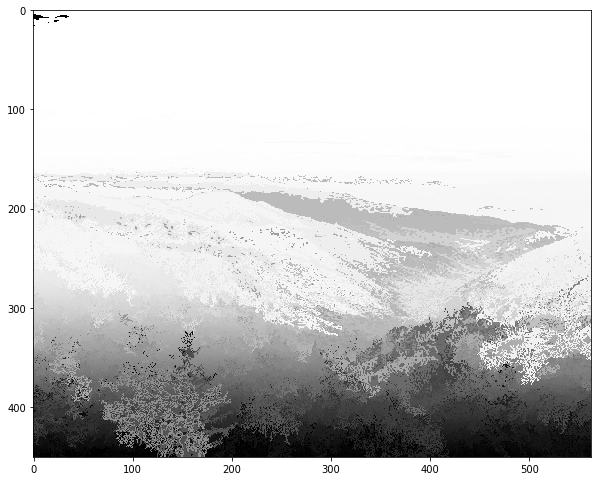

In [31]:
plt.figure(figsize=(10,10))
plt.imshow(label, cmap="gray")


In [19]:
np.save("../results/masks.npy", label)